In [1]:
import pandas as pd

In [2]:
feat_res = []

for i in range(1, 4):
    res = pd.read_csv(f'tbm{i}.csv')
    feat_res.append(res)

feat_res = pd.concat(feat_res)
feat_res.to_csv('tabula_muris_feat_results.csv')
feat_runs = pd.read_csv('tbm_feat_runs.csv')
df_tbm = feat_res.merge(feat_runs, left_on='run_name', right_on='Name')

In [3]:
df_tbm = df_tbm.loc[:, ['split',
 'acc_mean',
 'acc_std',
 'run_name','lr','method.cls.n_head', 'method.name',
 'dataset.set_cls.n_support',
 'method.cls.n_way',
 'method.cls.dim_feedforward',
 'method.cls.dropout',
 'method.cls.num_layers',
 'method.cls.score._target_','loss']]

In [4]:
df_tbm.head()

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,method.name,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
0,train,96.740000,5.097039,absurd-oath-568,0.0001,1,feat,5,5,128,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.257635
1,val,83.848889,10.706909,absurd-oath-568,0.0001,1,feat,5,5,128,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.257635
2,test,80.784444,11.114664,absurd-oath-568,0.0001,1,feat,5,5,128,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.257635
3,train,96.753333,5.040125,absurd-snowflake-592,0.0001,2,feat,5,5,128,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.254057
4,val,83.957778,10.578020,absurd-snowflake-592,0.0001,2,feat,5,5,128,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.254057


In [5]:
df_tbm_val = df_tbm.loc[df_tbm.split.isin(['val'])]
#df_tbm_val.sort_values(by=['acc_mean'], ascending=False)

best_hyps = df_tbm_val.sort_values(by=['acc_mean'], ascending=False).groupby(['dataset.set_cls.n_support','method.cls.n_way', 'split']).first()
best_hyps.to_csv('best_hyps.csv')

best_runs = df_tbm.loc[df_tbm.run_name.isin(best_hyps.run_name)]
best_runs

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,method.name,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
216,train,97.233333,3.915260,glorious-waterfall-579,0.001,2,feat,5,5,64,0.2,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.116407
217,val,87.913333,8.808155,glorious-waterfall-579,0.001,2,feat,5,5,64,0.2,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.116407
218,test,83.440000,10.458547,glorious-waterfall-579,0.001,2,feat,5,5,64,0.2,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.116407
228,train,95.160000,6.932021,graceful-universe-503,0.001,2,feat,1,5,32,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.290665
229,val,78.697778,12.722645,graceful-universe-503,0.001,2,feat,1,5,32,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.290665
230,test,77.313333,11.939212,graceful-universe-503,0.001,2,feat,1,5,32,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.290665


## Tabula muris - fealstm

In [7]:
fealstm_res = pd.read_csv('tbm_fealstm.csv')
fealstm_runs = pd.read_csv('tbm_fealstm_runs.csv')
df_fealstm = fealstm_res.merge(fealstm_runs, left_on='run_name', right_on='Name')

In [8]:
df_fealstm = df_fealstm.loc[:, ['split',
 'acc_mean',
 'acc_std',
 'run_name','lr','method.cls.n_head', 'method.name',
 'dataset.set_cls.n_support',
 'method.cls.n_way',
 'method.cls.dim_feedforward',
 'method.cls.dropout',
 'method.cls.num_layers',
 'method.cls.score._target_','loss']]

In [9]:
df_fealstm

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,method.name,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
0,train,98.604444,2.476971,likely-dust-639,0.0010,NaN,fealstm,5,5,NaN,NaN,2,methods.settoset.settoset.EuclideanDistanceScore,0.144938
1,val,88.815556,8.103135,likely-dust-639,0.0010,NaN,fealstm,5,5,NaN,NaN,2,methods.settoset.settoset.EuclideanDistanceScore,0.144938
2,test,88.717778,7.801827,likely-dust-639,0.0010,NaN,fealstm,5,5,NaN,NaN,2,methods.settoset.settoset.EuclideanDistanceScore,0.144938
3,train,98.524444,3.138848,noble-donkey-635,0.0010,NaN,fealstm,5,5,NaN,NaN,1,methods.settoset.settoset.EuclideanDistanceScore,0.123846
4,test,89.213333,7.703610,noble-donkey-635,0.0010,NaN,fealstm,5,5,NaN,NaN,1,methods.settoset.settoset.EuclideanDistanceScore,0.123846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,val,72.828889,11.932293,northern-breeze-634,0.0001,NaN,fealstm,1,5,NaN,NaN,4,methods.settoset.settoset.CosineSimilarityScore,2.180544
92,test,65.902222,12.654353,northern-breeze-634,0.0001,NaN,fealstm,1,5,NaN,NaN,4,methods.settoset.settoset.CosineSimilarityScore,2.180544
93,train,80.566667,13.332514,drawn-breeze-633,0.0010,NaN,fealstm,1,5,NaN,NaN,4,methods.settoset.settoset.CosineSimilarityScore,2.087108
94,val,72.600000,14.295765,drawn-breeze-633,0.0010,NaN,fealstm,1,5,NaN,NaN,4,methods.settoset.settoset.CosineSimilarityScore,2.087108


In [10]:
df_fealstm_val = df_fealstm.loc[df_fealstm.split.isin(['val'])]
#df_tbm_val.sort_values(by=['acc_mean'], ascending=False)

best_hyps = df_fealstm_val.sort_values(by=['acc_mean'], ascending=False).groupby(['dataset.set_cls.n_support','method.cls.n_way','split']).first()
best_hyps.to_csv('best_hyps_fealstm.csv')
best_hyps

best_runs = df_fealstm.loc[df_fealstm.run_name.isin(best_hyps.run_name)]
best_runs

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,method.name,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
18,train,97.182222,4.112598,honest-jazz-643,0.001,NaN,fealstm,5,5,NaN,NaN,3,methods.settoset.settoset.EuclideanDistanceScore,0.136037
19,val,89.977778,7.556961,honest-jazz-643,0.001,NaN,fealstm,5,5,NaN,NaN,3,methods.settoset.settoset.EuclideanDistanceScore,0.136037
20,test,88.193333,8.301073,honest-jazz-643,0.001,NaN,fealstm,5,5,NaN,NaN,3,methods.settoset.settoset.EuclideanDistanceScore,0.136037
36,train,91.313333,9.274396,grateful-rain-619,0.001,NaN,fealstm,1,5,NaN,NaN,1,methods.settoset.settoset.EuclideanDistanceScore,0.439631
37,val,80.306667,12.204949,grateful-rain-619,0.001,NaN,fealstm,1,5,NaN,NaN,1,methods.settoset.settoset.EuclideanDistanceScore,0.439631
38,test,77.317778,12.813294,grateful-rain-619,0.001,NaN,fealstm,1,5,NaN,NaN,1,methods.settoset.settoset.EuclideanDistanceScore,0.439631


# Tabula Muris - Feads

In [11]:
feads_res = pd.read_csv('tbm_feads.csv')
feads_runs = pd.read_csv('tbm_feads_runs.csv')
df_feads = feads_res.merge(feads_runs, left_on='run_name', right_on='Name')

df_feads = df_feads.loc[:, ['split',
 'acc_mean',
 'acc_std',
 'run_name','lr','method.cls.n_head', 'method.name',
 'dataset.set_cls.n_support',
 'method.cls.n_way',
 'method.cls.dim_feedforward',
 'method.cls.dropout',
 'method.cls.num_layers',
 'method.cls.score._target_','loss']]

df_feads_val = df_feads.loc[df_feads.split.isin(['val'])]
#df_tbm_val.sort_values(by=['acc_mean'], ascending=False)

best_hyps = df_feads_val.sort_values(by=['acc_mean'], ascending=False).groupby(['dataset.set_cls.n_support','method.cls.n_way', 'split']).first()
best_hyps.to_csv('best_hyps_feads.csv')
best_hyps

best_runs = df_feads.loc[df_feads.run_name.isin(best_hyps.run_name)]
best_runs

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,method.name,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
3,train,96.128889,4.705361,young-dream-657,0.001,NaN,feads,5,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.102728
4,val,87.951111,8.515118,young-dream-657,0.001,NaN,feads,5,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.102728
5,test,87.335556,8.606629,young-dream-657,0.001,NaN,feads,5,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.102728
6,train,95.733333,6.035942,sleek-dust-653,0.001,NaN,feads,1,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.323484
7,val,79.522222,13.034423,sleek-dust-653,0.001,NaN,feads,1,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.323484
8,test,78.646667,12.670276,sleek-dust-653,0.001,NaN,feads,1,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.323484


In [12]:
df_tabula = pd.concat([df_fealstm_val, df_tbm_val, df_feads_val])

In [13]:
df_tabula

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,method.name,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
1,val,88.815556,8.103135,likely-dust-639,0.0010,NaN,fealstm,5,5,NaN,NaN,2.0,methods.settoset.settoset.EuclideanDistanceScore,0.144938
5,val,88.122222,8.539574,noble-donkey-635,0.0010,NaN,fealstm,5,5,NaN,NaN,1.0,methods.settoset.settoset.EuclideanDistanceScore,0.123846
7,val,89.544444,7.907607,zany-music-647,0.0010,NaN,fealstm,5,5,NaN,NaN,4.0,methods.settoset.settoset.EuclideanDistanceScore,0.084540
11,val,88.608889,8.065817,scarlet-dream-644,0.0001,NaN,fealstm,5,5,NaN,NaN,3.0,methods.settoset.settoset.EuclideanDistanceScore,0.250252
14,val,87.793333,8.431438,cerulean-dew-636,0.0001,NaN,fealstm,5,5,NaN,NaN,1.0,methods.settoset.settoset.EuclideanDistanceScore,0.273025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,val,83.091111,11.183612,olive-energy-659,0.0010,NaN,feads,5,5,NaN,NaN,NaN,methods.settoset.settoset.CosineSimilarityScore,1.996297
13,val,76.815556,13.358700,zany-cosmos-654,0.0001,NaN,feads,1,5,NaN,NaN,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.842295
16,val,80.164444,11.587845,dutiful-dawn-660,0.0001,NaN,feads,5,5,NaN,NaN,NaN,methods.settoset.settoset.CosineSimilarityScore,2.046079
19,val,74.155556,14.055323,pretty-gorge-656,0.0001,NaN,feads,1,5,NaN,NaN,NaN,methods.settoset.settoset.CosineSimilarityScore,2.110681


# Swissprot 

In [14]:
res = pd.read_csv('sws_feads.csv')
runs = pd.read_csv('sws_feads_runs.csv')
df = res.merge(runs, left_on='run_name', right_on='Name')

df = df.loc[:, ['split',
 'acc_mean',
 'acc_std',
 'run_name','lr',
 'dataset.set_cls.n_support',
 'method.cls.n_way',
 'method.cls.score._target_','loss']]

df_sp_feads_val = df.loc[df.split.isin(['val'])]
#df_tbm_val.sort_values(by=['acc_mean'], ascending=False)

best_hyps = df_sp_feads_val.sort_values(by=['acc_mean'], ascending=False).groupby(['dataset.set_cls.n_support','method.cls.n_way', 'split']).first()
best_hyps.to_csv('sws_best_hyps_feads.csv')
best_hyps

best_runs = df.loc[df.run_name.isin(best_hyps.run_name)]
best_runs

,split,acc_mean,acc_std,run_name,lr,dataset.set_cls.n_support,method.cls.n_way,method.cls.score._target_,loss
0,train,96.413333,5.036266,good-terrain-869,0.0001,5,5,methods.settoset.settoset.EuclideanDistanceScore,0.676723
1,val,72.620000,9.996928,good-terrain-869,0.0001,5,5,methods.settoset.settoset.EuclideanDistanceScore,0.676723
2,test,63.660000,7.147542,good-terrain-869,0.0001,5,5,methods.settoset.settoset.EuclideanDistanceScore,0.676723
15,train,64.351111,14.592377,glad-universe-866,0.0010,1,5,methods.settoset.settoset.CosineSimilarityScore,2.133180
16,val,55.546667,13.042681,glad-universe-866,0.0010,1,5,methods.settoset.settoset.CosineSimilarityScore,2.133180
17,test,52.920000,12.233087,glad-universe-866,0.0010,1,5,methods.settoset.settoset.CosineSimilarityScore,2.133180


In [15]:
res = pd.read_csv('sws_fealstm.csv')
runs = pd.read_csv('sws_fealstm_runs.csv')
df = res.merge(runs, left_on='run_name', right_on='Name')

df = df.loc[:, ['split',
 'acc_mean',
 'acc_std',
 'run_name','lr',
 'dataset.set_cls.n_support',
 'method.cls.n_way',
 'method.cls.num_layers',
 'method.cls.score._target_','loss']]

df_sp_fealstm_val = df.loc[df.split.isin(['val'])]
#df_tbm_val.sort_values(by=['acc_mean'], ascending=False)

best_hyps = df_sp_fealstm_val.sort_values(by=['acc_mean'], ascending=False).groupby(['dataset.set_cls.n_support','method.cls.n_way', 'split']).first()
best_hyps.to_csv('sws_best_hyps_fealstm.csv')
best_hyps

best_runs = df.loc[df.run_name.isin(best_hyps.run_name)]
best_runs

,split,acc_mean,acc_std,run_name,lr,dataset.set_cls.n_support,method.cls.n_way,method.cls.num_layers,method.cls.score._target_,loss
18,train,80.908889,10.360638,divine-haze-848,0.0001,5,5,1,methods.settoset.settoset.EuclideanDistanceScore,0.774357
19,val,72.248889,9.857818,divine-haze-848,0.0001,5,5,1,methods.settoset.settoset.EuclideanDistanceScore,0.774357
20,test,64.193333,7.425359,divine-haze-848,0.0001,5,5,1,methods.settoset.settoset.EuclideanDistanceScore,0.774357
60,train,69.786667,13.915367,efficient-valley-836,0.0001,1,5,2,methods.settoset.settoset.EuclideanDistanceScore,7.228162
61,test,55.793333,11.580646,efficient-valley-836,0.0001,1,5,2,methods.settoset.settoset.EuclideanDistanceScore,7.228162
62,val,55.393333,12.072962,efficient-valley-836,0.0001,1,5,2,methods.settoset.settoset.EuclideanDistanceScore,7.228162


In [16]:
runs = pd.read_csv('sws_feat_runs.csv')

feat_res = []

for i in range(1, 5):
    res = pd.read_csv(f'sws_feat_{i}.csv')
    feat_res.append(res)

res = pd.concat(feat_res)

df = res.merge(runs, left_on='run_name', right_on='Name')

df = df.loc[:, ['split',
 'acc_mean',
 'acc_std',
 'run_name','lr','method.cls.n_head',
 'dataset.set_cls.n_support',
 'method.cls.n_way',
 'method.cls.dim_feedforward',
 'method.cls.dropout',
 'method.cls.num_layers',
 'method.cls.score._target_','loss']]

df_sp_feat_val = df.loc[df.split.isin(['val'])]
#df_tbm_val.sort_values(by=['acc_mean'], ascending=False)

best_hyps = df_sp_feat_val.sort_values(by=['acc_mean'], ascending=False).groupby(['dataset.set_cls.n_support','method.cls.n_way', 'split']).first()
best_hyps.to_csv('sws_best_hyps_feat.csv')
best_hyps

best_runs = df.loc[df.run_name.isin(best_hyps.run_name)]
best_runs

,split,acc_mean,acc_std,run_name,lr,method.cls.n_head,dataset.set_cls.n_support,method.cls.n_way,method.cls.dim_feedforward,method.cls.dropout,method.cls.num_layers,method.cls.score._target_,loss
114,train,86.224444,10.472822,eager-brook-681,0.0010,1,1,5,256,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.763930
115,val,56.157778,14.170036,eager-brook-681,0.0010,1,1,5,256,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.763930
116,test,53.331111,12.234135,eager-brook-681,0.0010,1,1,5,256,0.1,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.763930
138,train,90.153333,7.990377,expert-darkness-808,0.0001,4,5,5,256,0.2,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.939003
139,val,70.733333,9.065441,expert-darkness-808,0.0001,4,5,5,256,0.2,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.939003
140,test,64.933333,7.636947,expert-darkness-808,0.0001,4,5,5,256,0.2,NaN,methods.settoset.settoset.EuclideanDistanceScore,0.939003


# Visualizations

C:\Users\Marta\AppData\Local\Temp\ipykernel_18220\3207728151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_feat_val['dataset'] = 'Swissprot'
C:\Users\Marta\AppData\Local\Temp\ipykernel_18220\3207728151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tbm_val['dataset'] = 'Tabula Muris'


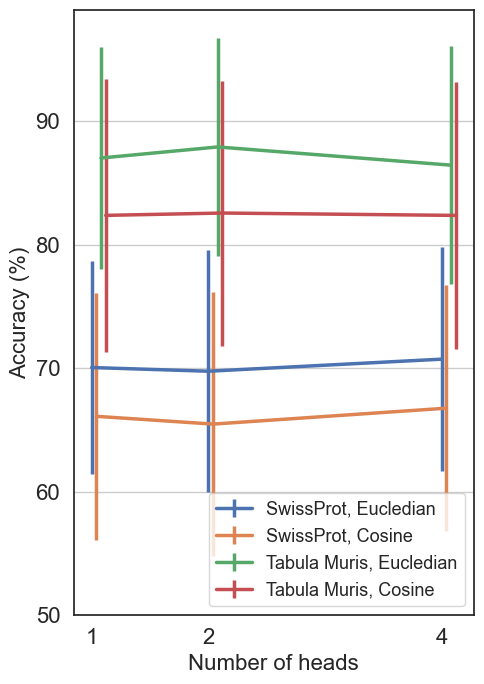

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_style("white")

df_sp_feat_val['dataset'] = 'Swissprot'
df_tbm_val['dataset'] = 'Tabula Muris'

data = pd.concat([df_sp_feat_val, df_tbm_val])

# (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore")
data_1 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["method.cls.dropout"] == 0.2) & (data["method.cls.dim_feedforward"] == 256) & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.n_head")
data_4 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["method.cls.dropout"] == 0.2) & (data["method.cls.dim_feedforward"] == 256) & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.n_head")
data_5 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["method.cls.dropout"] == 0.2) & (data["method.cls.dim_feedforward"] == 64) & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.n_head")
data_6 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["method.cls.dropout"] == 0.2) & (data["method.cls.dim_feedforward"] == 64) & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.n_head")


#data_2 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["method.cls.dropout"] == 0.1) & (data["method.cls.dim_feedforward"] == 512) & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.n_head")
#data_3 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["method.cls.dropout"] == 0.1) & (data["method.cls.dim_feedforward"] == 1024) & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.n_head")
data_sanje = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["method.cls.dropout"] == 0.1) & (data["method.cls.dim_feedforward"] == 32) & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.n_head")
plt.figure(figsize=(5,7))
plt.errorbar(x=data_1["method.cls.n_head"], y=data_1["acc_mean"], yerr=data_1["acc_std"], label='SwissProt, Eucledian', lw=2.5)
#plt.errorbar(x=data_2["method.cls.n_head"], y=data_2["acc_mean"], yerr=data_2["acc_std"])
#plt.errorbar(x=data_3["method.cls.n_head"], y=data_3["acc_mean"], yerr=data_3["acc_std"])
plt.errorbar(x=data_4["method.cls.n_head"] + 0.04, y=data_4["acc_mean"], yerr=data_4["acc_std"], label='SwissProt, Cosine', lw=2.5)
plt.errorbar(x=data_5["method.cls.n_head"]+ 0.08, y=data_5["acc_mean"], yerr=data_5["acc_std"], label='Tabula Muris, Eucledian', lw=2.5)
plt.errorbar(x=data_6["method.cls.n_head"]+ 0.12, y=data_6["acc_mean"], yerr=data_6["acc_std"], label='Tabula Muris, Cosine', lw=2.5)
plt.legend(loc='lower right', fontsize=13)
plt.xticks([1,2,4], [1, 2, 4], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(50, 99)

plt.xlabel('Number of heads',  fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.grid(axis="y")
plt.tight_layout()


In [19]:
df_sp_fealstm_val['dataset'] = 'Swissprot'
df_fealstm_val['dataset'] = 'Tabula Muris'

C:\Users\Marta\AppData\Local\Temp\ipykernel_18220\412286974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fealstm_val['dataset'] = 'Tabula Muris'


Text(0, 0.5, 'Accuracy (%)')

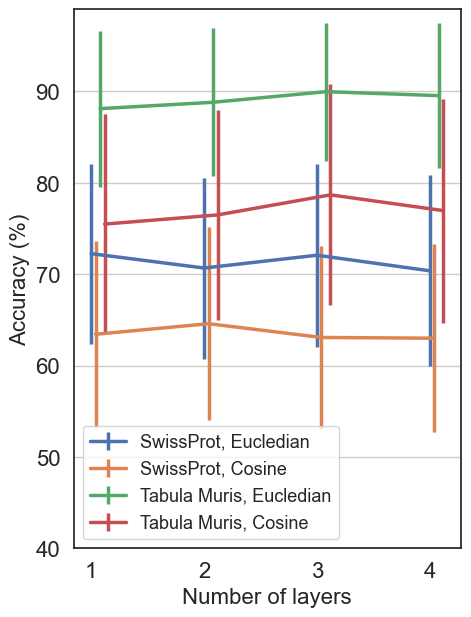

In [20]:

data = pd.concat([df_sp_fealstm_val, df_fealstm_val])

# (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore")
data_1 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
data_2 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
data_3 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")

data_4 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")
data_5 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")

data_6 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
data_7 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
plt.figure(figsize=(5,7))

#plt.errorbar(x=data_1["method.cls.num_layers"], y=data_1["acc_mean"], yerr=data_1["acc_std"])
plt.errorbar(x=data_2["method.cls.num_layers"], y=data_2["acc_mean"], yerr=data_2["acc_std"], label='SwissProt, Eucledian', lw=2.5)
plt.errorbar(x=data_3["method.cls.num_layers"] + 0.04, y=data_3["acc_mean"], yerr=data_3["acc_std"],label='SwissProt, Cosine', lw=2.5)
plt.errorbar(x=data_6["method.cls.num_layers"] + 0.08, y=data_6["acc_mean"], yerr=data_6["acc_std"],label='Tabula Muris, Eucledian', lw=2.5)
plt.errorbar(x=data_7["method.cls.num_layers"] + 0.12, y=data_7["acc_mean"], yerr=data_7["acc_std"], label='Tabula Muris, Cosine', lw=2.5)
plt.legend(fontsize=13)
plt.grid(axis="y")

plt.ylim(40, 99)
plt.xticks([1,2,3,4], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of layers',  fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Accuracy (%)')

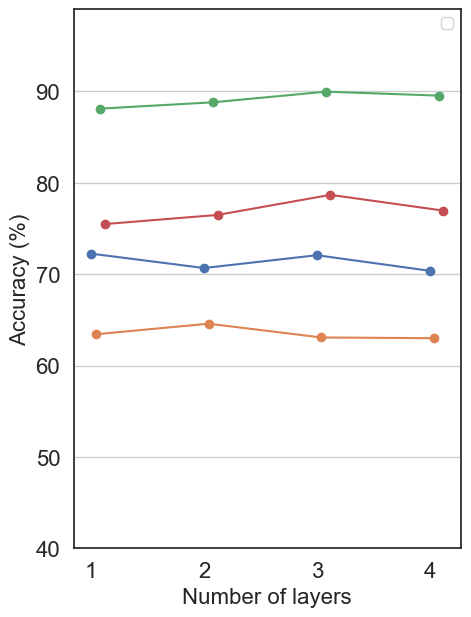

In [21]:

data = pd.concat([df_sp_fealstm_val, df_fealstm_val])

# (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore")
data_1 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
data_2 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
data_3 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")

data_4 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")
data_5 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")

data_6 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
data_7 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 5))].sort_values(by="method.cls.num_layers")
plt.figure(figsize=(5,7))

#plt.errorbar(x=data_1["method.cls.num_layers"], y=data_1["acc_mean"], yerr=data_1["acc_std"])
plt.errorbar(data_2["method.cls.num_layers"], data_2["acc_mean"], marker= 'o')#yerr=data_2["acc_std"], label='SwissProt, Eucledian', lw=2.5)
plt.errorbar(data_3["method.cls.num_layers"] + 0.04, data_3["acc_mean"], marker= 'o')#yerr=data_3["acc_std"],label='SwissProt, Cosine', lw=2.5)
plt.errorbar(data_6["method.cls.num_layers"] + 0.08, data_6["acc_mean"], marker= 'o')#yerr=data_6["acc_std"],label='Tabula Muris, Eucledian', lw=2.5)
plt.errorbar(data_7["method.cls.num_layers"] + 0.12, data_7["acc_mean"], marker= 'o')#yerr=data_7["acc_std"], label='Tabula Muris, Cosine', lw=2.5)
plt.legend()
plt.grid(axis="y")

plt.ylim(40, 99)
plt.xticks([1,2,3,4], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of layers',  fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)

<ErrorbarContainer object of 3 artists>

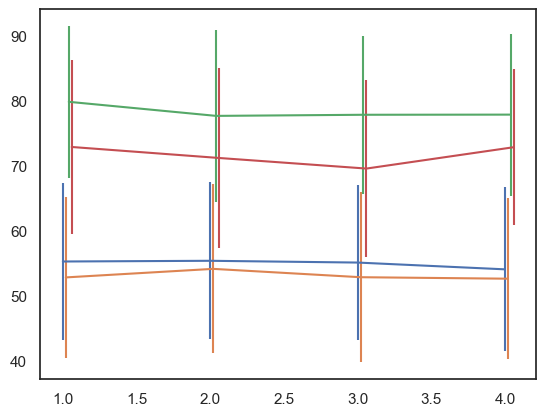

In [22]:
data_4 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")
data_5 = data.loc[((data.dataset=="Swissprot") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")
data_8 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.EuclideanDistanceScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")
data_9 = data.loc[((data.dataset=="Tabula Muris") & (data.lr == 0.0001) & (data["method.cls.score._target_"]=="methods.settoset.settoset.CosineSimilarityScore") & (data["dataset.set_cls.n_support"] == 1))].sort_values(by="method.cls.num_layers")

plt.errorbar(x=data_4["method.cls.num_layers"], y=data_4["acc_mean"], yerr=data_4["acc_std"], label='SwissProt, Eucledian')
plt.errorbar(x=data_5["method.cls.num_layers"] + 0.02, y=data_5["acc_mean"], yerr=data_5["acc_std"],label='SwissProt, Cosine')
plt.errorbar(x=data_8["method.cls.num_layers"] + 0.04, y=data_8["acc_mean"], yerr=data_8["acc_std"],label='Tabula Muris, Eucledian')
plt.errorbar(x=data_9["method.cls.num_layers"] + 0.06, y=data_9["acc_mean"], yerr=data_9["acc_std"], label='Tabula Muris, Cosine')
